In [3]:
using Pkg
Pkg.activate("../../Project.toml")

using ITensors
using Plots
using Random

include("../RealRealFast_generic.jl")
include("../benchmarking/benchUtils.jl")

  Activating project at `~/Documents/QML Project/QuantumInspiredML`


expand_dataset (generic function with 1 method)

In [7]:
(X_train, y_train), (X_val, y_val), (X_test, y_test) = load_splits_txt("../datasets/ECG_train.txt", 
"../datasets/ECG_val.txt", "../datasets/ECG_test.txt");
X_train = vcat(X_train, X_val);
y_train = vcat(y_train, y_val);

scaler = fit_scaler(RobustSigmoidTransform, X_train; range=Options(encoding=Encoding("Fourier")).encoding.range);
    X_train_scaled = transform_data(scaler, X_train)
    X_val_scaled = transform_data(scaler, X_val)
    X_test_scaled = transform_data(scaler, X_test)

In [11]:
size(X_train)

hists = [histogram(x) for x in eachrow(X_train)];

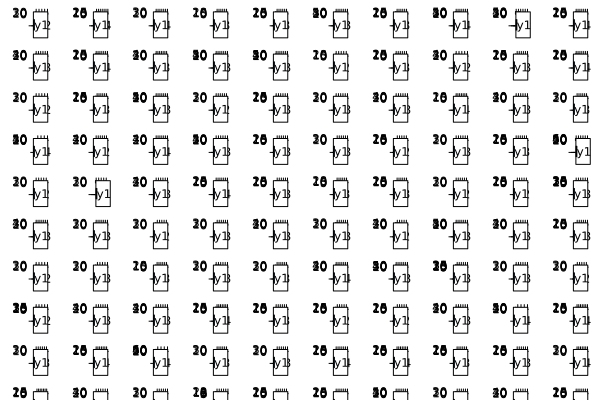

In [12]:
plot(hists...)